# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [45]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [46]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class Node:
    def __init__(self, key, left=None, right=None):
        self.key = key
        self.left = left
        self.right = right
        
        
        
class NodeWithHeight(Node):
    def __init__(self, key, left=None, right=None, height=1):
        super().__init__(key, left, right)
        self.height = height

    

class Color():
    RED = True
    BLACK = False



class ColoredNode(Node):
    def __init__(self, key, left=None, right=None, color=Color.RED):
        super().__init__(key, left, right)
        self.color = color
        
        
    def isRed(self):
        return self.color == Color.RED
    
    
    def isBlack(self):
        return self.color == Color.BLACK

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [47]:
class AVLTree(AbstractSearchInterface):
    
    def __init__(self):
        self.root = None
        
        
    def insertElement(self, element):
        inserted, self.root = self.insertElementRecursive(self.root, element)
        return inserted
    
    
    def insertElementRecursive(self, node, element):
        if node is None:
            return True, NodeWithHeight(element)
        if element < node.key:
            inserted, node.left = self.insertElementRecursive(node.left, element)
        elif element > node.key:
            inserted, node.right = self.insertElementRecursive(node.right, element)
        else:
            return False, node
        
        self.updateHeight(node)
        balance = self.getBalance(node)
        
        if balance > 1 and element < node.left.key:
            return True, self.rightRotate(node)
        if balance < -1 and element > node.right.key:
            return True, self.leftRotate(node)
        if balance > 1 and element > node.left.key:
            node.left = self.leftRotate(node.left)
            return True, self.rightRotate(node)
        if balance < -1 and element < node.right.key:
            node.right = self.rightRotate(node.right)
            return True, self.leftRotate(node)
                
        return inserted, node
    
    
    def updateHeight(self, node):
        node.height = 1 + max(self.getHeight(node.left), self.getHeight(node.right))
    
    
    def getHeight(self, node):
        return node.height if node else 0
        
        
    def getBalance(self, node):
        return self.getHeight(node.left) - self.getHeight(node.right) if node else 0
 
 
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        self.updateHeight(z) 
        self.updateHeight(y)
        return y


    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        self.updateHeight(z)
        self.updateHeight(y)
        return y
    
    
    def searchElement(self, element):     
        return self.searchElementRecursive(self.root, element)
    
    
    def searchElementRecursive(self, node, element):
        if node is None:
            return False
        if element < node.key:
            return self.searchElementRecursive(node.left, element)
        elif element > node.key:
            return self.searchElementRecursive(node.right, element)
        else:
            return True

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [48]:
class LLRBBST(AbstractSearchInterface):

    def __init__(self):
        self.root = None
        
        
    def insertElement(self, element):
        inserted, self.root = self.insertElementRecursive(self.root, element)
        return inserted
    
    
    def insertElementRecursive(self, node, element):
        if node is None:
            return True, self.createNode(element)
        if element < node.key:
            inserted, node.left = self.insertElementRecursive(node.left, element)
        elif element > node.key:
            inserted, node.right = self.insertElementRecursive(node.right, element)
        else:
            return False, node
        return inserted, self.balanceTree(node) if inserted else node
        
        
    def createNode(self, key):
        return ColoredNode(key)
    
    
    def balanceTree(self, node):
        if self.isRed(node.right) and not self.isRed(node.left):
            node = self.rotateLeft(node)
        if self.isRed(node.left) and self.isRed(node.left.left):
            node = self.rotateRight(node)
        if self.isRed(node.left) and self.isRed(node.right):
            self.flipColors(node)
        return node


    def isRed(self, node):
        return node is not None and node.isRed()


    def rotateLeft(self, node):
        temp = node.right
        node.right = temp.left
        temp.left = node
        temp.color = node.color
        node.color = Color.RED
        return temp
    
    
    def rotateRight(self, node):
        temp = node.left
        node.left = temp.right
        temp.right = node
        temp.color = node.color
        node.color = Color.RED
        return temp
    
    
    def flipColors(self, node):
        node.color = Color.RED
        node.left.color = Color.BLACK
        node.right.color = Color.BLACK
        

    def searchElement(self, element):     
        return self.searchElementRecursive(self.root, element)  
    
    
    def searchElementRecursive(self, node, element):
        if node is None:
            return False
        if element < node.key:
            return self.searchElementRecursive(node.left, element)
        elif element > node.key:
            return self.searchElementRecursive(node.right, element)
        else:
            return True

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [49]:
class ScapegoatTree(AbstractSearchInterface):
    def __init__(self, alpha=0.6):
        self.root = None
        self.size = 0
        self.maxSize = 0
        self.alpha = alpha


    def insertElement(self, element):
        depth = [0]
        success, self.root = self.insertElementRecursive(self.root, element, depth)
        if success:
            self.size += 1
            self.maxSize = max(self.size, self.maxSize)
            if depth[0] > self.logAlpha(self.maxSize):
                scapegoat = self.findScapegoat(self.root, element)
                self.rebuild(scapegoat)


    def insertElementRecursive(self, node, key, depth):
        if node is None:
            return True, NodeWithHeight(key)

        node.height += 1
        depth[0] += 1

        if key < node.key:
            inserted, node.left = self.insertElementRecursive(node.left, key, depth)
        elif key > node.key:
            inserted, node.right = self.insertElementRecursive(node.right, key, depth)
        else:
            node.height -= 1
            return False, node

        return inserted, node
    
    
    def logAlpha(self, n):
        from math import log
        return int(log(n) / log(1 / self.alpha))
    
    
    def findScapegoat(self, node, key):
        path = []
        curr = node
        while curr:
            path.append(curr)
            if key < curr.key:
                curr = curr.left
            elif key > curr.key:
                curr = curr.right
            else:
                break

        for i in range(len(path) - 1, -1, -1):
            curr = path[i]
            leftHeight = curr.left.height if curr.left else 0
            rightHeight = curr.right.height if curr.right else 0
            if max(leftHeight, rightHeight) > self.alpha * curr.height:
                return curr
        return None


    def rebuild(self, scapegoat):
        parent = self.findParent(self.root, scapegoat)
        nodes = self.flatten(scapegoat)
        newSubtree = self.buildBalanced(nodes, 0, len(nodes) - 1)

        if parent is None:
            self.root = newSubtree
        elif parent.left == scapegoat:
            parent.left = newSubtree
        else:
            parent.right = newSubtree

    def flatten(self, node):
        result = []
        def inorder(n):
            if n:
                inorder(n.left)
                result.append(n)
                inorder(n.right)
        inorder(node)
        return result

    def buildBalanced(self, nodes, start, end):
        if start > end:
            return None
        mid = (start + end) // 2
        root = nodes[mid]
        root.left = self.buildBalanced(nodes, start, mid - 1)
        root.right = self.buildBalanced(nodes, mid + 1, end)
        root.height = 1 + (root.left.height if root.left else 0) + (root.right.height if root.right else 0)
        return root

    def findParent(self, root, target):
        if root is None or root == target:
            return None
        if root.left == target or root.right == target:
            return root
        if target.key < root.key:
            return self.findParent(root.left, target)
        else:
            return self.findParent(root.right, target)

    def searchElement(self, key):
        return self.searchElementRecursive(self.root, key)

    def searchElementRecursive(self, node, key):
        if node is None:
            return False
        if key < node.key:
            return self.searchElementRecursive(node.left, key)
        elif key > node.key:
            return self.searchElementRecursive(node.right, key)
        return True


Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [50]:
import string
import random

class TestDataGenerator():
    '''
    A class to represent a synthetic data generator.

    '''
    
        
    def __init__(self):
        self.randomGenerator = random.Random()
    
    
    def generatedDataBatch(self, n):
        return {
            "random": self.generateDataRandom(n),
            "sorted_ascending": self.generateDataSortedAscending(n),
            "sorted_descending": self.generateDataSortedDescending(n),
            "almost_sorted": self.generateDataAlmostSorted(n),
            "alternating": self.generateDataAlternating(n),
            "only_duplicates": self.generateDataOnlyDuplicates(n),
            "half_duplicates": self.generateDataHalfDuplicates(n)
        }
    
    
    def generateDataRandom(self, n):
        return [self.generateRandomString(5) for _ in range(n)]
    
    
    def generateRandomString(self, string_length):
        return ''.join(self.randomGenerator.choices(string.ascii_letters, k = string_length))
    
    
    def generateDataSortedAscending(self, n):
        return sorted(self.generateDataRandom(n))
    
    
    def generateDataSortedDescending(self, n):
        return sorted(self.generateDataRandom(n), reverse=True)
        
    
    def generateDataAlmostSorted(self, n):
        data = self.generateDataSortedAscending(n)
        for _ in range(n // 10):
            i, j = random.randint(0, n - 1), random.randint(0, n - 1)
            data[i], data[j] = data[j], data[i]
        return data

    
    def generateDataAlternating(self, n):
        data = self.generateDataSortedAscending(n)
        return [data[i] for i in range(0, n, 2)] + [data[i] for i in range(n - 1 if n % 2 == 1 else n - 2, 0, -2)]
    
    
    def generateDataOnlyDuplicates(self, n):
        return self.generateDataRandom(1) * n
    
    
    def generateDataHalfDuplicates(self, n):
        return self.generateDataRandom(n//2) * 2
    

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [51]:
import timeit
import random
import string
import math
from statistics import mean, median, stdev

# --- ExperimentalFramework ---
class ExperimentalFramework():
    """
    Framework to run performance experiments on search data structures.
    
    Attributes:
      data_generator: instance of TestDataGenerator.
      algorithms: dict mapping algorithm names to their classes.
      sizes: list of dataset sizes.
      trials: number of trials per experiment.
      results: nested dictionary storing results.
               Structure: results[structureName][dataSize][dataLabel] = {"insertionTimes": [...], "searchTimes": [...]}
    """
    
    def __init__(self, dataGenerator, structures, sizes, trials):
        self.dataGenerator = dataGenerator
        self.structures = structures
        self.sizes = sizes
        self.trials = trials
        self.results = {structureName: {size: {} for size in sizes} for structureName in structures}
        
        
    def runExperiments(self):
        for size in self.sizes:
            for _ in range(self.trials):
                dataBatch = self.dataGenerator.generatedDataBatch(size)
                for structureName, structureClass in self.structures.items():
                    self.testStructureWithBatch(structureName, structureClass, dataBatch, size)
        return self.results
    
    
    def testStructureWithBatch(self, structureName, structureClass, dataBatch, size):
        for dataLabel, data in dataBatch.items():
            self.ensureResultsStructureExists(structureName, size, dataLabel)
            self.testStructureWithData(structureName, structureClass, data, dataLabel, size)        
            
            
    def ensureResultsStructureExists(self, structureName, size, dataLabel):
        if dataLabel not in self.results[structureName][size]:
            self.results[structureName][size][dataLabel] = {
                "insertionTimes": [],
                "searchTimes": []
            }
            
            
    def testStructureWithData(self, structureName, structureClass, data, dataLabel, size):
        structure = structureClass()
        searchKeys = self.generateSearchKeys(data)
        insertionTime, searchTime = self.runTrial(structure, data, searchKeys)
        self.results[structureName][size][dataLabel]["insertionTimes"].append(insertionTime)
        self.results[structureName][size][dataLabel]["searchTimes"].append(searchTime)
        print(f"Completed: {structureName} with data type '{dataLabel}' and size {size}")


    def generateSearchKeys(self, data):
        return data[:] if len(data) < 200 else random.sample(data, min(100, len(data))) + [self.dataGenerator.generateRandomString(5) for _ in range(100)]
    
    
    def runTrial(self, structure, data, searchKeys):
        return self.timeDataInsertionInStructure(structure, data), self.timeDataSearchInStructure(structure, searchKeys)
        
        
    def timeDataInsertionInStructure(self, structure, data):
        start = timeit.default_timer()
        for key in data:
            structure.insertElement(key)
        return timeit.default_timer() - start
    
    
    def timeDataSearchInStructure(self, structure, searchKeys):
        start = timeit.default_timer()
        for key in searchKeys:
            structure.searchElement(key)
        return timeit.default_timer() - start
    

    def averageTrialTimes(self, size):
        for structureName in self.structures:
            for dataLabel in self.results[structureName][size]:
                self.results[structureName][size][dataLabel]["insertionTimes"] = mean(self.results[structureName][size][dataLabel]["insertionTimes"])
                self.results[structureName][size][dataLabel]["searchTimes"] = mean(self.results[structureName][size][dataLabel]["searchTimes"])
        
    
    def plot_metric(self, algo_name, size, metric="insertionTimes"):
        import matplotlib.pyplot as plt
        data_types = list(self.results[algo_name][size].keys())
        groups = [self.results[algo_name][size][dt][metric] for dt in data_types]
        plt.figure(figsize=(12, 6))
        plt.boxplot(groups, labels=data_types)
        plt.xlabel("Data Type")
        plt.ylabel("Time (s)")
        plt.title(f"{algo_name} - {metric.replace('_', ' ').capitalize()} for n = {size}")
        plt.show()

# --- Statistical Test Functions ---
def kruskal_wallis(groups):
    combined = []
    for i, group in enumerate(groups):
        for value in group:
            combined.append((value, i))
    combined.sort(key=lambda x: x[0])
    N = len(combined)
    ranks = [0] * N
    i = 0
    while i < N:
        j = i
        while j < N and combined[j][0] == combined[i][0]:
            j += 1
        avg_rank = (i + 1 + j) / 2.0
        for k in range(i, j):
            ranks[k] = avg_rank
        i = j
    group_rank_sum = {}
    group_count = {}
    for (rank, group_index) in zip(ranks, [item[1] for item in combined]):
        group_rank_sum[group_index] = group_rank_sum.get(group_index, 0) + rank
        group_count[group_index] = group_count.get(group_index, 0) + 1
    H = 0.0
    for i in group_rank_sum:
        n_i = group_count[i]
        avg_R = group_rank_sum[i] / n_i
        H += n_i * (avg_R - (N + 1) / 2.0) ** 2
    H = (12.0 / (N * (N + 1))) * H
    df = len(groups) - 1
    return H, df


def dunn_test(groups, group_names=None):
    combined = []
    for i, group in enumerate(groups):
        for value in group:
            combined.append((value, i))
    combined.sort(key=lambda x: x[0])
    N = len(combined)
    ranks = [0] * N
    i = 0
    while i < N:
        j = i
        while j < N and combined[j][0] == combined[i][0]:
            j += 1
        avg_rank = (i + 1 + j) / 2.0
        for k in range(i, j):
            ranks[k] = avg_rank
        i = j
    group_rank_sum = {}
    group_count = {}
    for (rank, group_index) in zip(ranks, [item[1] for item in combined]):
        group_rank_sum[group_index] = group_rank_sum.get(group_index, 0) + rank
        group_count[group_index] = group_count.get(group_index, 0) + 1
    comparisons = {}
    groups_keys = sorted(group_rank_sum.keys())
    variance_factor = N * (N + 1) / 12.0
    for i in groups_keys:
        for j in groups_keys:
            if j <= i:
                continue
            diff = (group_rank_sum[i] / group_count[i]) - (group_rank_sum[j] / group_count[j])
            se = math.sqrt(variance_factor * (1 / group_count[i] + 1 / group_count[j]))
            z = diff / se
            phi = 0.5 * (1 + math.erf(abs(z) / math.sqrt(2)))
            p = 2 * (1 - phi)
            num_comparisons = len(groups_keys) * (len(groups_keys) - 1) / 2
            p_adjusted = min(p * num_comparisons, 1.0)
            if group_names:
                name_i = group_names[i]
                name_j = group_names[j]
                comparisons[(name_i, name_j)] = {'z': z, 'p': p, 'p_adjusted': p_adjusted}
            else:
                comparisons[(i, j)] = {'z': z, 'p': p, 'p_adjusted': p_adjusted}
    return comparisons


Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

Starting tests...
Completed: Scapegoat Tree with data type 'random' and size 10
Completed: Scapegoat Tree with data type 'sorted_ascending' and size 10
Completed: Scapegoat Tree with data type 'sorted_descending' and size 10
Completed: Scapegoat Tree with data type 'almost_sorted' and size 10
Completed: Scapegoat Tree with data type 'alternating' and size 10
Completed: Scapegoat Tree with data type 'only_duplicates' and size 10
Completed: Scapegoat Tree with data type 'half_duplicates' and size 10
Completed: AVL Tree with data type 'random' and size 10
Completed: AVL Tree with data type 'sorted_ascending' and size 10
Completed: AVL Tree with data type 'sorted_descending' and size 10
Completed: AVL Tree with data type 'almost_sorted' and size 10
Completed: AVL Tree with data type 'alternating' and size 10
Completed: AVL Tree with data type 'only_duplicates' and size 10
Completed: AVL Tree with data type 'half_duplicates' and size 10
Completed: Red-Black Tree with data type 'random' and 

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2859899235.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(insertionResultsGroups, labels=shortenedDataLabels)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2859899235.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(searchResultsGroups, labels=shortenedDataLabels)


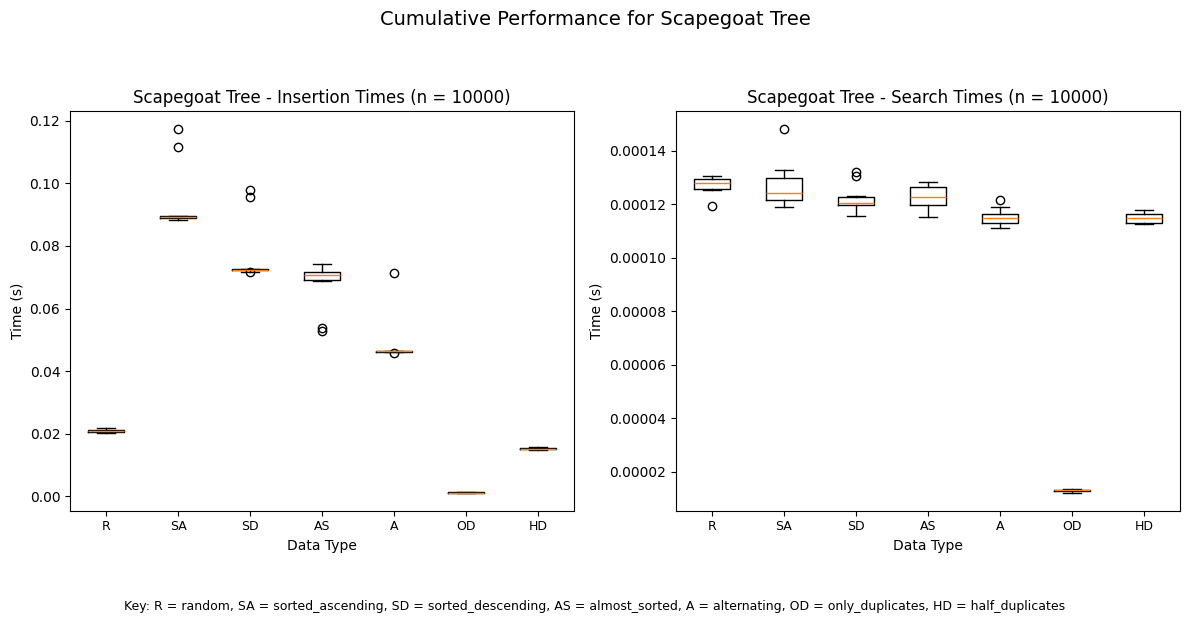

Kruskal-Wallis Test for Insertion Times (across data types) for Scapegoat Tree
  H statistic: 65.7721, Degrees of Freedom: 6
Kruskal-Wallis Test for Search Times (across data types) for Scapegoat Tree
  H statistic: 52.9064, Degrees of Freedom: 6

Dunn's Test for Insertion Times:
  R vs. SA: z = -4.2192, Bonferroni-adjusted p-value = 0.0005
  R vs. SD: z = -3.2853, Bonferroni-adjusted p-value = 0.0214
  R vs. AS: z = -2.3074, Bonferroni-adjusted p-value = 0.4417
  R vs. A: z = -1.1757, Bonferroni-adjusted p-value = 1.0000
  R vs. OD: z = 2.1975, Bonferroni-adjusted p-value = 0.5877
  R vs. HD: z = 1.0987, Bonferroni-adjusted p-value = 1.0000
  SA vs. SD: z = 0.9339, Bonferroni-adjusted p-value = 1.0000
  SA vs. AS: z = 1.9118, Bonferroni-adjusted p-value = 1.0000
  SA vs. A: z = 3.0435, Bonferroni-adjusted p-value = 0.0491
  SA vs. OD: z = 6.4167, Bonferroni-adjusted p-value = 0.0000
  SA vs. HD: z = 5.3179, Bonferroni-adjusted p-value = 0.0000
  SD vs. AS: z = 0.9779, Bonferroni-adjus

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2859899235.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(insertionResultsGroups, labels=shortenedDataLabels)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2859899235.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(searchResultsGroups, labels=shortenedDataLabels)


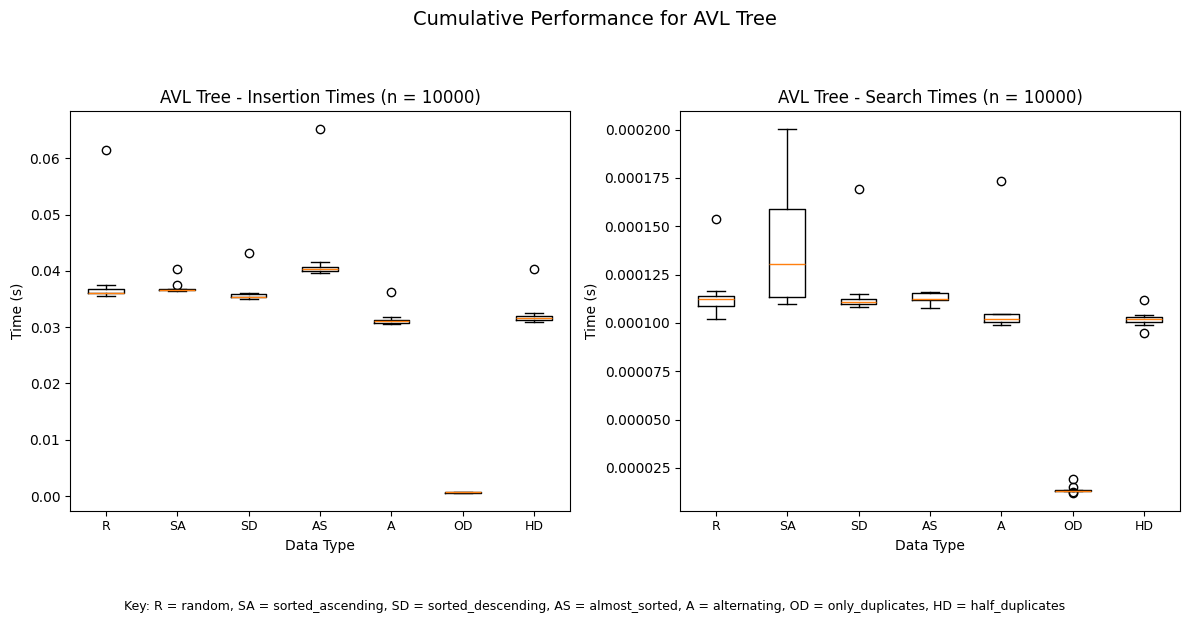

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2859899235.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(insertionResultsGroups, labels=shortenedDataLabels)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2859899235.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(searchResultsGroups, labels=shortenedDataLabels)


Kruskal-Wallis Test for Insertion Times (across data types) for AVL Tree
  H statistic: 56.8095, Degrees of Freedom: 6
Kruskal-Wallis Test for Search Times (across data types) for AVL Tree
  H statistic: 48.6852, Degrees of Freedom: 6

Dunn's Test for Insertion Times:
  R vs. SA: z = -0.5713, Bonferroni-adjusted p-value = 1.0000
  R vs. SD: z = 1.0328, Bonferroni-adjusted p-value = 1.0000
  R vs. AS: z = -1.7910, Bonferroni-adjusted p-value = 1.0000
  R vs. A: z = 2.9556, Bonferroni-adjusted p-value = 0.0655
  R vs. OD: z = 4.4829, Bonferroni-adjusted p-value = 0.0002
  R vs. HD: z = 2.1975, Bonferroni-adjusted p-value = 0.5877
  SA vs. SD: z = 1.6042, Bonferroni-adjusted p-value = 1.0000
  SA vs. AS: z = -1.2196, Bonferroni-adjusted p-value = 1.0000
  SA vs. A: z = 3.5270, Bonferroni-adjusted p-value = 0.0088
  SA vs. OD: z = 5.0542, Bonferroni-adjusted p-value = 0.0000
  SA vs. HD: z = 2.7688, Bonferroni-adjusted p-value = 0.1181
  SD vs. AS: z = -2.8238, Bonferroni-adjusted p-value 

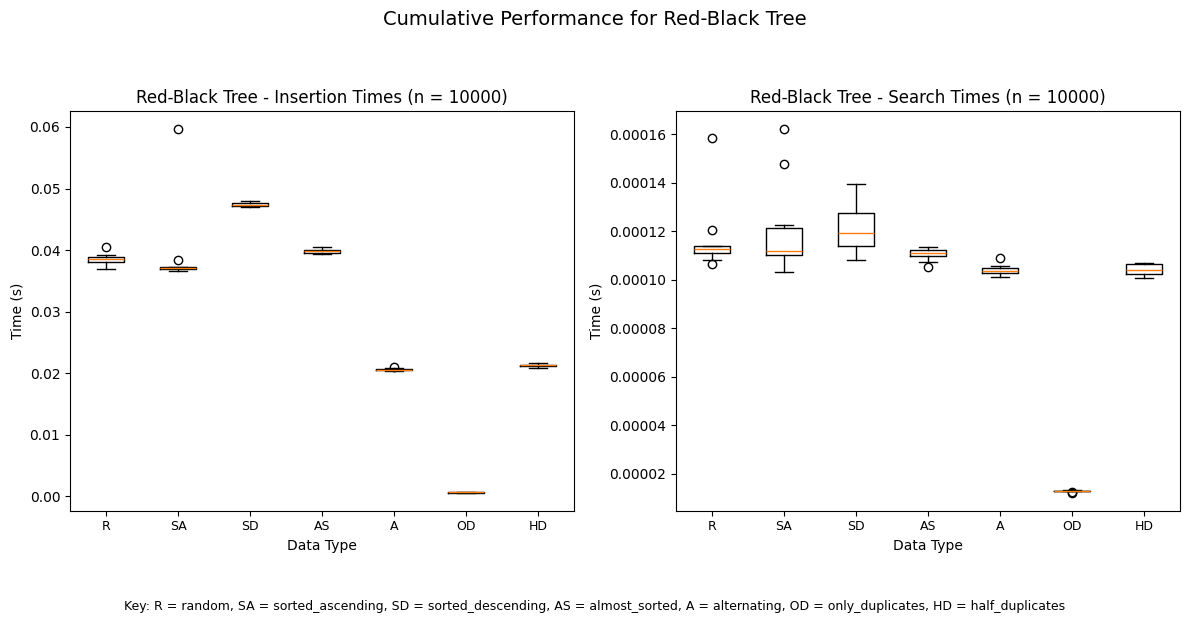

Kruskal-Wallis Test for Insertion Times (across data types) for Red-Black Tree
  H statistic: 64.2292, Degrees of Freedom: 6
Kruskal-Wallis Test for Search Times (across data types) for Red-Black Tree
  H statistic: 53.6803, Degrees of Freedom: 6

Dunn's Test for Insertion Times:
  R vs. SA: z = 0.5933, Bonferroni-adjusted p-value = 1.0000
  R vs. SD: z = -2.1755, Bonferroni-adjusted p-value = 0.6214
  R vs. AS: z = -0.9669, Bonferroni-adjusted p-value = 1.0000
  R vs. A: z = 3.1864, Bonferroni-adjusted p-value = 0.0303
  R vs. OD: z = 4.3071, Bonferroni-adjusted p-value = 0.0003
  R vs. HD: z = 2.1316, Bonferroni-adjusted p-value = 0.6939
  SA vs. SD: z = -2.7688, Bonferroni-adjusted p-value = 0.1181
  SA vs. AS: z = -1.5602, Bonferroni-adjusted p-value = 1.0000
  SA vs. A: z = 2.5930, Bonferroni-adjusted p-value = 0.1998
  SA vs. OD: z = 3.7138, Bonferroni-adjusted p-value = 0.0043
  SA vs. HD: z = 1.5382, Bonferroni-adjusted p-value = 1.0000
  SD vs. AS: z = 1.2086, Bonferroni-adjus

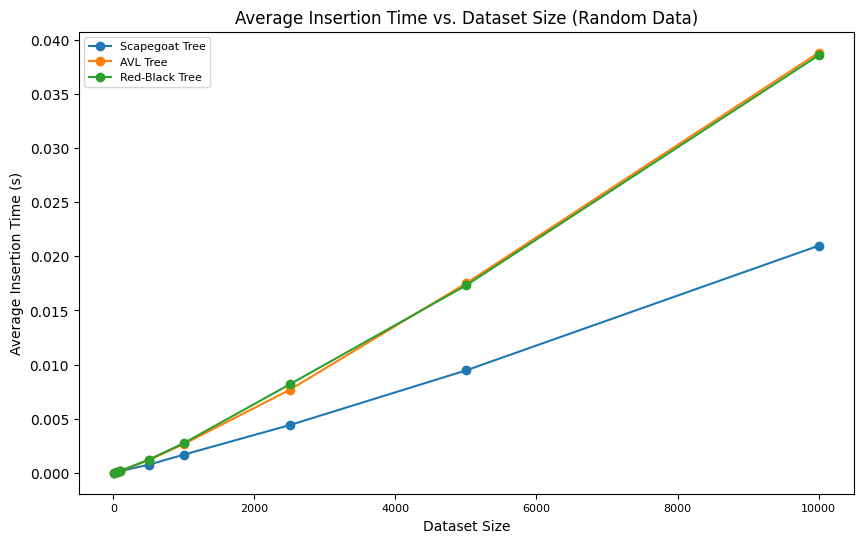

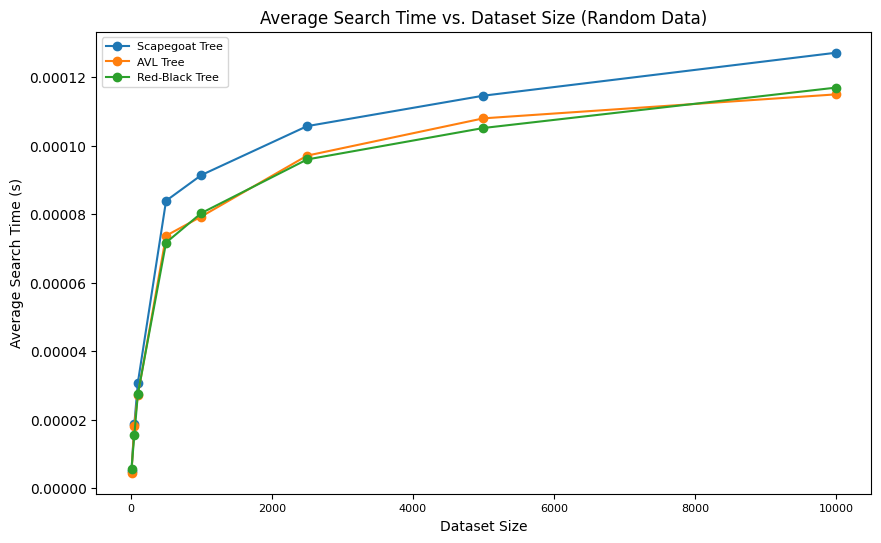

In [52]:
import matplotlib.pyplot as plt
from statistics import mean

dataTypeMapping = {
    "random": "R",
    "sorted_ascending": "SA",
    "sorted_descending": "SD",
    "almost_sorted": "AS",
    "alternating": "A",
    "only_duplicates": "OD",
    "half_duplicates": "HD"
}

sizes = [10, 50, 100, 500, 1000, 2500, 5000, 10000]
trials = 10

structures = {
    "Scapegoat Tree": ScapegoatTree,
    "AVL Tree": AVLTree,
    "Red-Black Tree": LLRBBST
}

dataGenerator = TestDataGenerator()

experimentalFramework = ExperimentalFramework(dataGenerator, structures, sizes, trials)

print("Starting tests...")

experimentResults = experimentalFramework.runExperiments()

# ----- Cumulative Box Plots for Each Algorithm -----
chosenSize = max(sizes)

for structureName in structures:
    generatedDataLabels = list(experimentResults[structureName][chosenSize].keys())
    shortenedDataLabels = [dataTypeMapping[label] for label in generatedDataLabels]

    insertionResultsGroups = [experimentResults[structureName][chosenSize][dataLabel]["insertionTimes"] for dataLabel in generatedDataLabels]
    searchResultsGroups = [experimentResults[structureName][chosenSize][dataLabel]["searchTimes"] for dataLabel in generatedDataLabels]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.boxplot(insertionResultsGroups, labels=shortenedDataLabels)
    ax1.set_title(f"{structureName} - Insertion Times (n = {chosenSize})", fontsize=12)
    ax1.set_xlabel("Data Type", fontsize=10)
    ax1.set_ylabel("Time (s)", fontsize=10)
    ax1.tick_params(axis='x', labelsize=9)

    ax2.boxplot(searchResultsGroups, labels=shortenedDataLabels)
    ax2.set_title(f"{structureName} - Search Times (n = {chosenSize})", fontsize=12)
    ax2.set_xlabel("Data Type", fontsize=10)
    ax2.set_ylabel("Time (s)", fontsize=10)
    ax2.tick_params(axis='x', labelsize=9)

    keyText = "Key: " + ", ".join([f"{shortenedDataLabels[i]} = {generatedDataLabels[i]}" for i in range(len(generatedDataLabels))])

    fig.suptitle(f"Cumulative Performance for {structureName}", fontsize=14)
    fig.text(0.5, -0.02, keyText, ha='center', fontsize=9)
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    plt.show()

    print("Kruskal-Wallis Test for Insertion Times (across data types) for", structureName)
    H_ins, df_ins = kruskal_wallis(insertionResultsGroups)
    print(f"  H statistic: {H_ins:.4f}, Degrees of Freedom: {df_ins}")

    print("Kruskal-Wallis Test for Search Times (across data types) for", structureName)
    H_sch, df_sch = kruskal_wallis(searchResultsGroups)
    print(f"  H statistic: {H_sch:.4f}, Degrees of Freedom: {df_sch}")

    print("\nDunn's Test for Insertion Times:")
    dunn_ins = dunn_test(insertionResultsGroups, group_names=shortenedDataLabels)
    for (name1, name2), stats in dunn_ins.items():
        print(f"  {name1} vs. {name2}: z = {stats['z']:.4f}, Bonferroni-adjusted p-value = {stats['p_adjusted']:.4f}")

    print("\nDunn's Test for Search Times:")
    dunn_sch = dunn_test(searchResultsGroups, group_names=shortenedDataLabels)
    for (name1, name2), stats in dunn_sch.items():
        print(f"  {name1} vs. {name2}: z = {stats['z']:.4f}, Bonferroni-adjusted p-value = {stats['p_adjusted']:.4f}")


dataLabel = "random"
plt.figure(figsize=(10, 6))
for structureName in structures:
    sizes = sorted(experimentResults[structureName].keys())
    averageInsertionTimes = [mean(experimentResults[structureName][size][dataLabel]["insertionTimes"]) for size in sizes]
    plt.plot(sizes, averageInsertionTimes, marker='o', label=structureName)
plt.xlabel("Dataset Size", fontsize=10)
plt.ylabel("Average Insertion Time (s)", fontsize=10)
plt.title(f"Average Insertion Time vs. Dataset Size ({dataLabel.capitalize()} Data)", fontsize=12)
plt.legend(loc="upper left", fontsize=8)
plt.xticks(fontsize=8)
plt.show()

plt.figure(figsize=(10, 6))
for structureName in structures:
    sizes = sorted(experimentResults[structureName].keys())
    averageSearchTimes = [mean(experimentResults[structureName][size][dataLabel]["searchTimes"]) for size in sizes]
    plt.plot(sizes, averageSearchTimes, marker='o', label=structureName)
plt.xlabel("Dataset Size", fontsize=10)
plt.ylabel("Average Search Time (s)", fontsize=10)
plt.title(f"Average Search Time vs. Dataset Size ({dataLabel.capitalize()} Data)", fontsize=12)
plt.legend(loc="upper left", fontsize=8)
plt.xticks(fontsize=8)
plt.show()

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


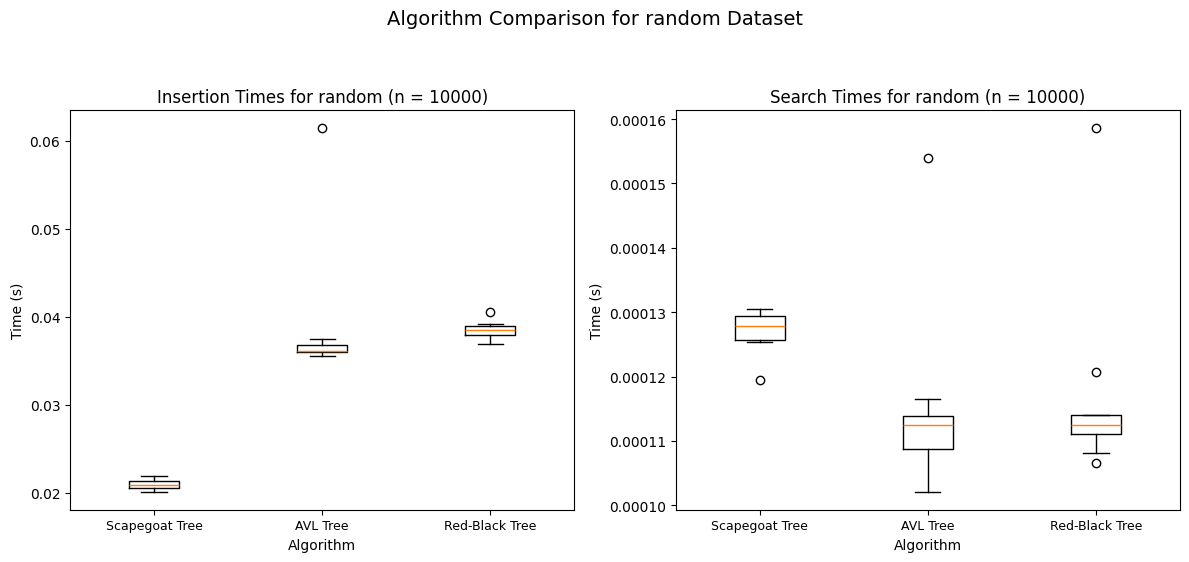

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


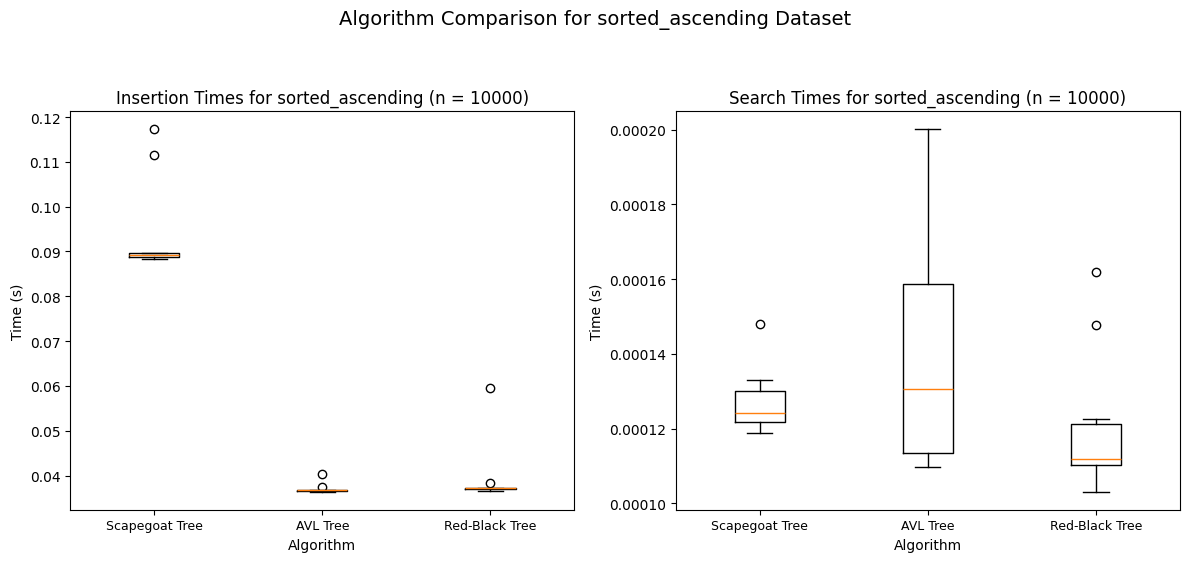

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


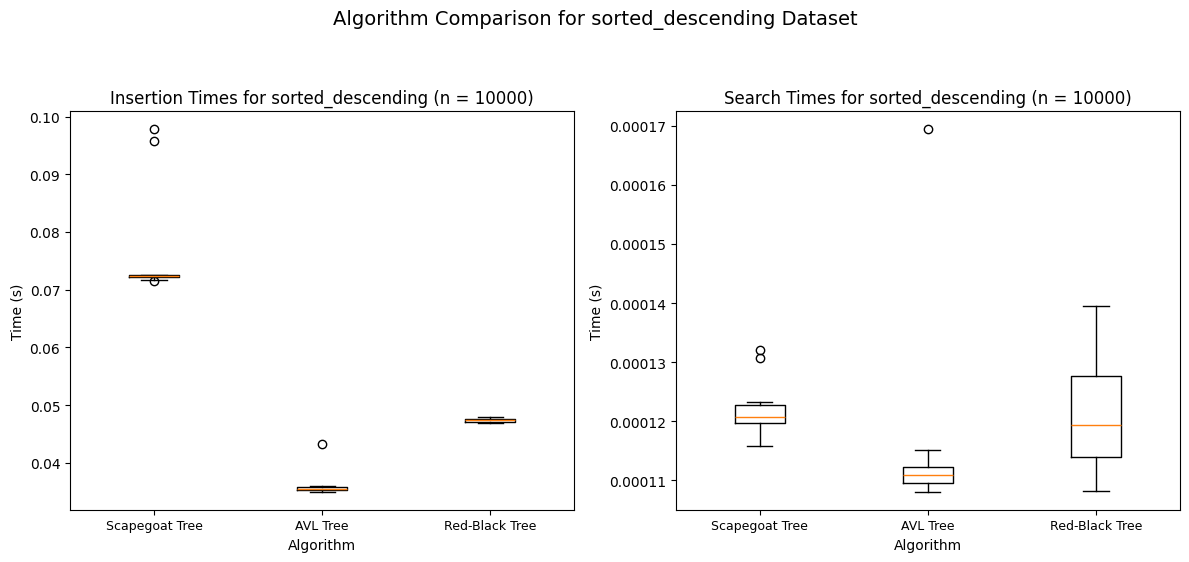

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


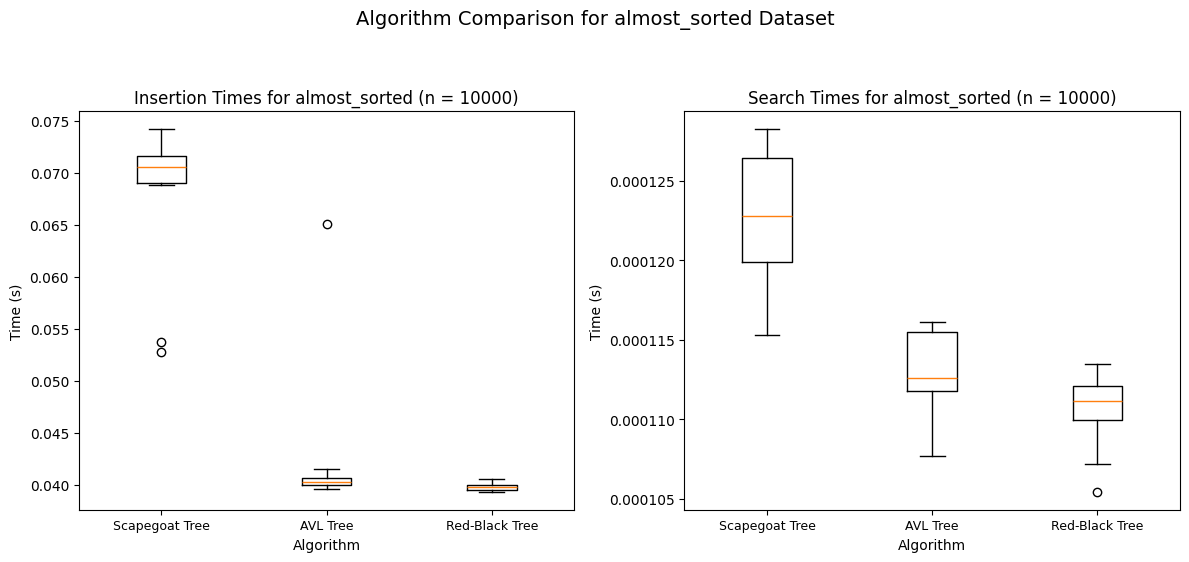

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


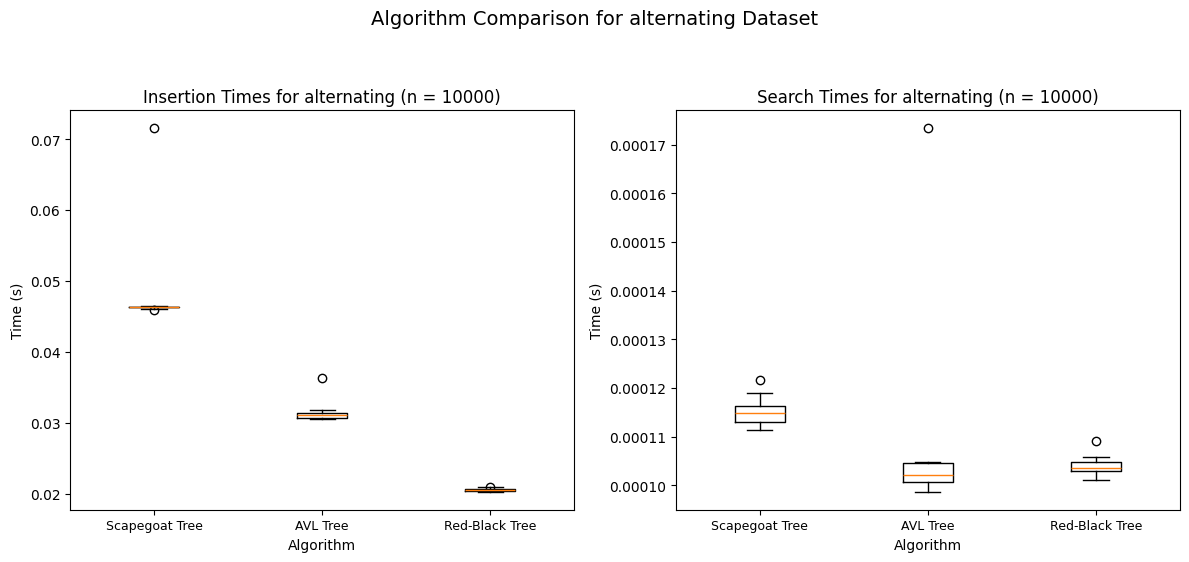

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


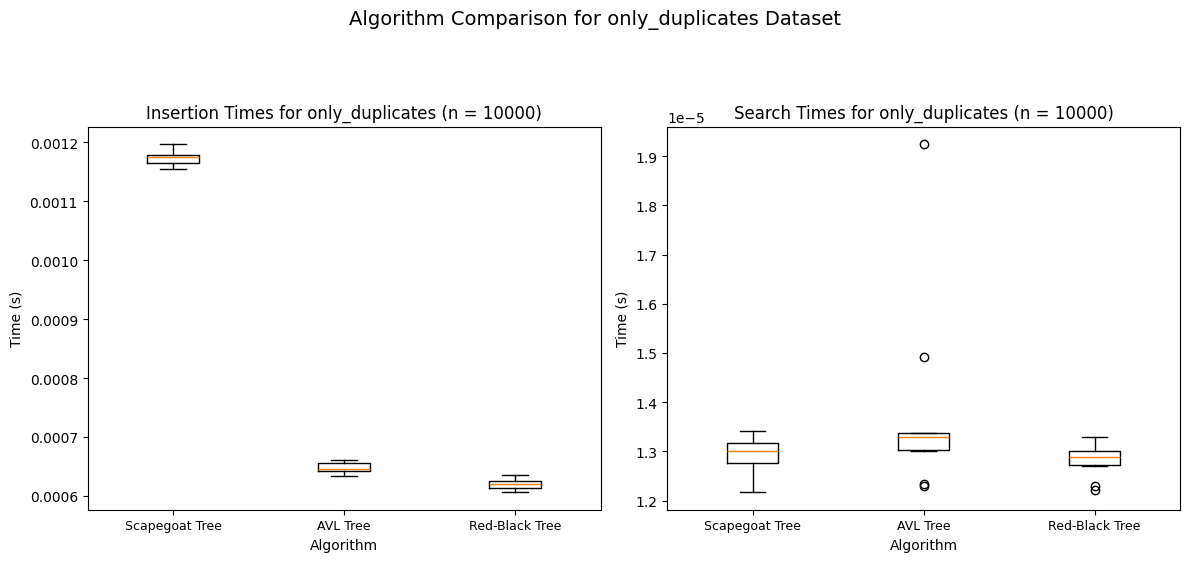

/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(structureInsertionGroups, labels=structureNames)
/var/folders/nf/wf918rb54xdfsz6n8tsjlwq00000gn/T/ipykernel_44261/2233881990.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(structureSearchGroups, labels=structureNames)


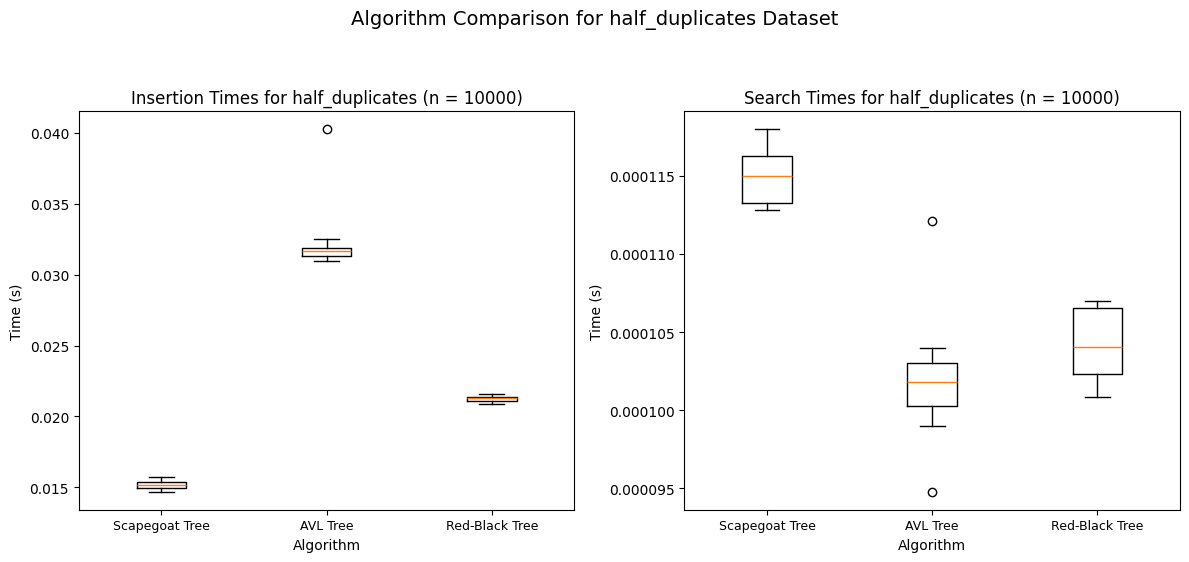

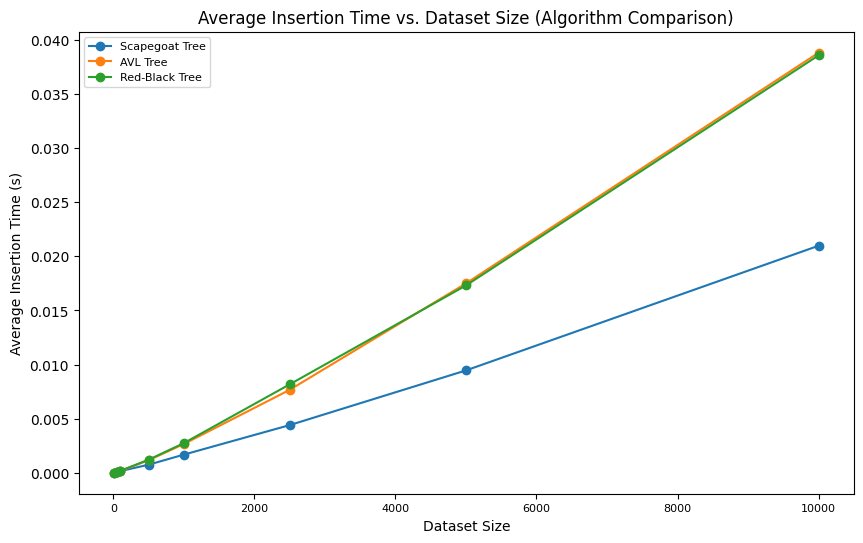

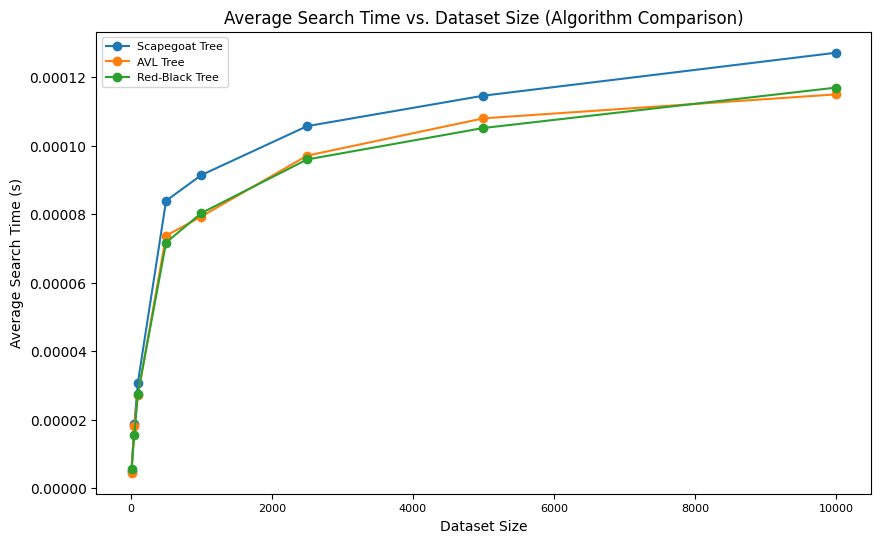


Kruskal-Wallis Test for Insertion Times (random)
  H statistic: 23.2800, Degrees of Freedom: 2

Kruskal-Wallis Test for Search Times (random)
  H statistic: 12.1884, Degrees of Freedom: 2

Dunn's Test for Insertion Times:
  Scapegoat Tree vs. AVL Tree: z = -2.8194, Bonferroni-adjusted p-value = 0.0144
  Scapegoat Tree vs. Red-Black Tree: z = -4.8006, Bonferroni-adjusted p-value = 0.0000
  AVL Tree vs. Red-Black Tree: z = -1.9812, Bonferroni-adjusted p-value = 0.1427

Dunn's Test for Search Times:
  Scapegoat Tree vs. AVL Tree: z = 3.1750, Bonferroni-adjusted p-value = 0.0045
  Scapegoat Tree vs. Red-Black Tree: z = 2.8448, Bonferroni-adjusted p-value = 0.0133
  AVL Tree vs. Red-Black Tree: z = -0.3302, Bonferroni-adjusted p-value = 1.0000

Kruskal-Wallis Test for Insertion Times (sorted_ascending)
  H statistic: 21.2361, Degrees of Freedom: 2

Kruskal-Wallis Test for Search Times (sorted_ascending)
  H statistic: 4.6529, Degrees of Freedom: 2

Dunn's Test for Insertion Times:
  Scapeg

In [53]:
import matplotlib.pyplot as plt
from statistics import mean

chosenSize = max(sizes)
structureNames = list(structures.keys())

for dataLabel in dataTypeMapping.keys():
    structureInsertionGroups = [experimentResults[structureName][chosenSize][dataLabel]["insertionTimes"] for structureName in structureNames]
    structureSearchGroups = [experimentResults[structureName][chosenSize][dataLabel]["searchTimes"] for structureName in structureNames]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.boxplot(structureInsertionGroups, labels=structureNames)
    ax1.set_title(f"Insertion Times for {dataLabel} (n = {chosenSize})", fontsize=12)
    ax1.set_xlabel("Algorithm", fontsize=10)
    ax1.set_ylabel("Time (s)", fontsize=10)
    ax1.tick_params(axis='x', labelsize=9)

    ax2.boxplot(structureSearchGroups, labels=structureNames)
    ax2.set_title(f"Search Times for {dataLabel} (n = {chosenSize})", fontsize=12)
    ax2.set_xlabel("Algorithm", fontsize=10)
    ax2.set_ylabel("Time (s)", fontsize=10)
    ax2.tick_params(axis='x', labelsize=9)

    fig.suptitle(f"Algorithm Comparison for {dataLabel} Dataset", fontsize=14)
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])
    plt.show()

plt.figure(figsize=(10, 6))
for structureName in structureNames:
    averageInsertionTimes = [mean(experimentResults[structureName][size]["random"]["insertionTimes"]) for size in sizes]
    plt.plot(sizes, averageInsertionTimes, marker='o', label=structureName)
plt.xlabel("Dataset Size", fontsize=10)
plt.ylabel("Average Insertion Time (s)", fontsize=10)
plt.title("Average Insertion Time vs. Dataset Size (Algorithm Comparison)", fontsize=12)
plt.legend(loc="upper left", fontsize=8)
plt.xticks(fontsize=8)
plt.show()

plt.figure(figsize=(10, 6))
for structureName in structureNames:
    averageSearchTimes = [mean(experimentResults[structureName][size]["random"]["searchTimes"]) for size in sizes]
    plt.plot(sizes, averageSearchTimes, marker='o', label=structureName)
plt.xlabel("Dataset Size", fontsize=10)
plt.ylabel("Average Search Time (s)", fontsize=10)
plt.title("Average Search Time vs. Dataset Size (Algorithm Comparison)", fontsize=12)
plt.legend(loc="upper left", fontsize=8)
plt.xticks(fontsize=8)
plt.show()

for dataLabel in dataTypeMapping.keys():
    print(f"\nKruskal-Wallis Test for Insertion Times ({dataLabel})")
    algorithmInsertionGroups = [experimentResults[structureName][chosenSize][dataLabel]["insertionTimes"] for structureName in structureNames]
    H_ins, df_ins = kruskal_wallis(algorithmInsertionGroups)
    print(f"  H statistic: {H_ins:.4f}, Degrees of Freedom: {df_ins}")

    print(f"\nKruskal-Wallis Test for Search Times ({dataLabel})")
    algorithmSearchGroups = [experimentResults[structureName][chosenSize][dataLabel]["searchTimes"] for structureName in structureNames]
    H_sch, df_sch = kruskal_wallis(algorithmSearchGroups)
    print(f"  H statistic: {H_sch:.4f}, Degrees of Freedom: {df_sch}")

    print("\nDunn's Test for Insertion Times:")
    dunn_ins = dunn_test(algorithmInsertionGroups, group_names=structureNames)
    for (name1, name2), stats in dunn_ins.items():
        print(f"  {name1} vs. {name2}: z = {stats['z']:.4f}, Bonferroni-adjusted p-value = {stats['p_adjusted']:.4f}")

    print("\nDunn's Test for Search Times:")
    dunn_sch = dunn_test(algorithmSearchGroups, group_names=structureNames)
    for (name1, name2), stats in dunn_sch.items():
        print(f"  {name1} vs. {name2}: z = {stats['z']:.4f}, Bonferroni-adjusted p-value = {stats['p_adjusted']:.4f}")
